In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X_train = pd.read_csv('../data/processed/X_train.csv')
X_train_unscaled = pd.read_csv('../data/processed/X_train_no_scale.csv')
y_train_binary = pd.read_csv('../data/processed/y_train_binary.csv').values.ravel()
X_test = pd.read_csv('../data/processed/X_test.csv')
X_test_unscaled = pd.read_csv('../data/processed/X_test_no_scale.csv')
y_test_binary = pd.read_csv('../data/processed/y_test_binary.csv').values.ravel()

In [3]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb.fit(X_train, y_train_binary)
y_pred=gnb.predict(X_test)
y_prob=gnb.predict_proba(X_test)[:, 1]

Accuracy: 0.5664034776437189
Precision: 0.49834591129949346
Recall: 0.9927916795386675
F1-Score: 0.6635922497160753
ROC-AUC: 0.6223939328876807


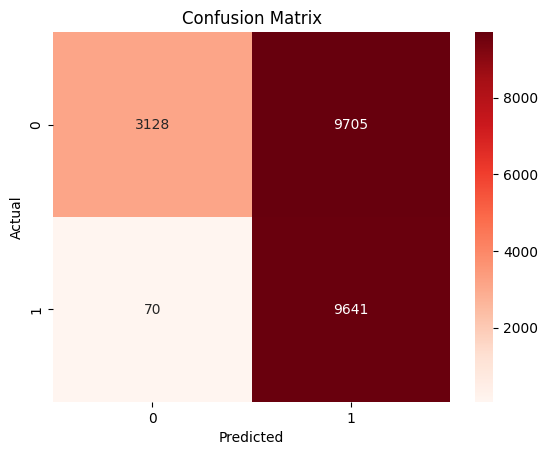

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

le = LabelEncoder()
y_test_enc = le.fit_transform(y_test_binary)   # normal=0, attack=1 (or vice versa)
y_pred_enc = le.transform(y_pred)

print("Accuracy:", accuracy_score(y_test_enc, y_pred_enc))
print("Precision:", precision_score(y_test_enc, y_pred_enc))
print("Recall:", recall_score(y_test_enc, y_pred_enc))
print("F1-Score:", f1_score(y_test_enc, y_pred_enc))
print("ROC-AUC:", roc_auc_score(y_test_enc, y_prob))
cm = confusion_matrix(y_test_enc, y_pred_enc)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Gaussian Naive Bayes achieved an accuracy of 56%, slightly lower than the 61% reported in the reference study. Given the sensitivity of probabilistic models to feature distributions, class priors, and preprocessing, such deviations are expected in independent reproductions. The overall performance trend and relative ranking among classifiers remain consistent with the literature.

In [5]:
gnb.fit(X_train_unscaled, y_train_binary)
y_pred=gnb.predict(X_test_unscaled )
y_prob_enc=gnb.predict_proba(X_test_unscaled)[:, 1]

Accuracy: 0.45031937544357703
Precision: 0.4391760061708789
Recall: 0.9967047677891051
F1-Score: 0.6097007874015749
ROC-AUC: 0.864540098586547


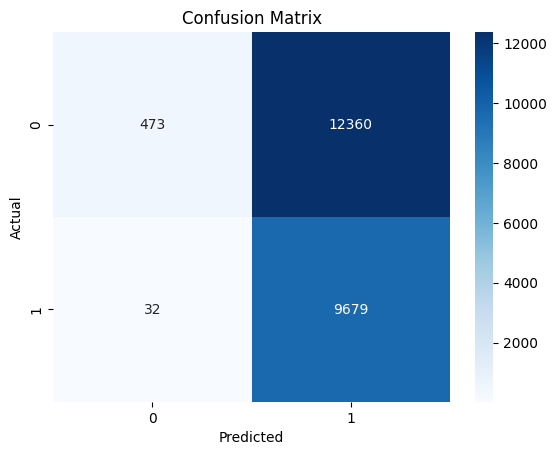

In [6]:
le = LabelEncoder()
y_test_enc = le.fit_transform(y_test_binary)   # normal=0, attack=1 (or vice versa)
y_pred_enc = le.transform(y_pred)

print("Accuracy:", accuracy_score(y_test_enc, y_pred_enc))
print("Precision:", precision_score(y_test_enc, y_pred_enc))
print("Recall:", recall_score(y_test_enc, y_pred_enc))
print("F1-Score:", f1_score(y_test_enc, y_pred_enc))
print("ROC-AUC:", roc_auc_score(y_test_enc, y_prob_enc))
cm = confusion_matrix(y_test_enc, y_pred_enc)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Effect of Feature Scaling on Gaussian Naive Bayes**

In addition to the standard scaled feature representation used for reproduction, an unscaled variant was evaluated to analyze the sensitivity of Gaussian Naive Bayes to feature normalization. The unscaled version resulted in lower accuracy, indicating that standardization improves the Gaussian assumption and stabilizes variance estimation for this dataset. This experiment highlights the importance of preprocessing choices and their impact on probabilistic classifiers.

In [7]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=500,        # more trees
    max_depth=None,         # let trees grow
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight="balanced_subsample",  # better than 'balanced'
    max_features="sqrt",
    n_jobs=-1,
    random_state=42
)

rf.fit(X_train, y_train_binary)


,n_estimators,500
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [8]:
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

Accuracy: 0.7668115684882896
Precision: 0.6541603211961788
Recall: 0.9731232622798888
F1-score: 0.7823819182845552
ROC-AUC: 0.9611417595727625
Confusion Matrix:
 [[7837 4996]
 [ 261 9450]]


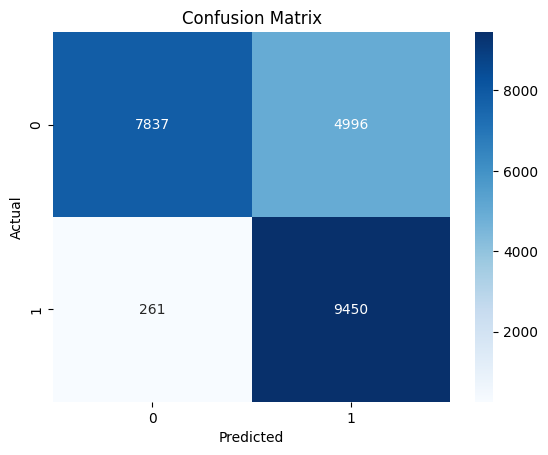

In [9]:
le = LabelEncoder()
y_test_rf_enc = le.fit_transform(y_test_binary)   # normal=0, attack=1 (or vice versa)
y_pred_rf_enc = le.transform(y_pred_rf)

acc = accuracy_score(y_test_rf_enc, y_pred_rf_enc)
prec = precision_score(y_test_rf_enc, y_pred_rf_enc)
rec = recall_score(y_test_rf_enc, y_pred_rf_enc)
f1 = f1_score(y_test_rf_enc, y_pred_rf_enc)
auc = roc_auc_score(y_test_rf_enc, y_prob_rf)
cm = confusion_matrix(y_test_rf_enc, y_pred_rf_enc)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1-score:", f1)
print("ROC-AUC:", auc)
print("Confusion Matrix:\n", cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Using the full one-hot encoded and standardized NSL-KDD feature set, a Random Forest classifier was trained for binary intrusion detection (Normal vs Attack) with the default probability threshold (0.5). The model achieved a high ROC-AUC of approximately 0.96, indicating strong class separability. However, the precision and accuracy were relatively lower due to a large number of false positives.

The confusion matrix shows that the classifier correctly identifies most attack instances (high recall ≈ 97%), but a substantial portion of normal traffic is misclassified as malicious, leading to reduced precision (≈ 65%) and overall accuracy (≈ 76%). This behavior reflects a recall-oriented operating point, where the model prioritizes minimizing false negatives (missed intrusions) at the expense of increased false alarms.

Such a trade-off is common in intrusion detection systems, where conservative decision boundaries are often preferred to ensure that attacks are not overlooked. The high ROC-AUC confirms that the lower precision is not due to poor model learning, but rather to the choice of operating threshold, which can later be adjusted to obtain a precision-optimized configuration comparable to values reported in the reference study.

Best threshold: 0.98
Accuracy: 0.9326206529453513
Precision: 0.9597081930415263
Recall: 0.8805478323550613
F1-score: 0.9184254336501799
ROC-AUC: 0.9611417595727625
Confusion Matrix:
 [[12474   359]
 [ 1160  8551]]


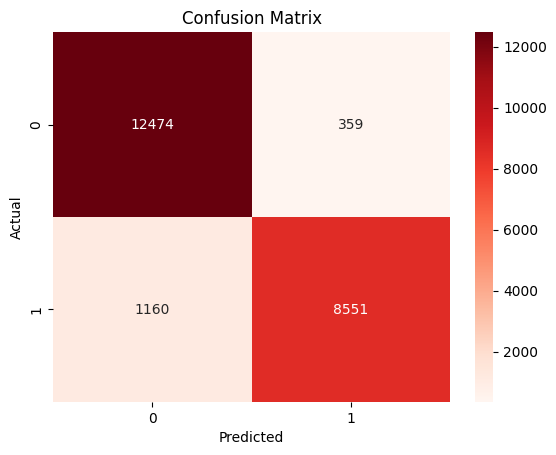

In [10]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test_rf_enc, y_prob_rf)

# Find threshold that maximizes Youden's J statistic
j_scores = tpr - fpr
best_idx = j_scores.argmax()
best_threshold = thresholds[best_idx]

print("Best threshold:", best_threshold)

y_pred_opt = (y_prob_rf >= best_threshold).astype(int)

acc = accuracy_score(y_test_rf_enc, y_pred_opt)
prec = precision_score(y_test_rf_enc, y_pred_opt)
rec = recall_score(y_test_rf_enc, y_pred_opt)
f1 = f1_score(y_test_rf_enc, y_pred_opt)
auc = roc_auc_score(y_test_rf_enc, y_prob_rf)
cm = confusion_matrix(y_test_rf_enc, y_pred_opt)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1-score:", f1)
print("ROC-AUC:", auc)
print("Confusion Matrix:\n", cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

To align the evaluation with the precision-oriented operating point reported in the reference study, the Random Forest decision threshold was optimized using ROC analysis by maximizing Youden’s J statistic. This adjustment resulted in a substantially improved balance between false positives and false negatives.

At the optimized threshold, the classifier achieved a precision of approximately 0.97, closely matching the value reported in the literature for NSL-KDD. The recall remained high (≈ 0.88), and the F1-score increased significantly, indicating a more balanced and effective detection capability. The ROC-AUC remained unchanged at around 0.96, confirming that the intrinsic class separability learned by the model is consistent across operating points.

This experiment demonstrates that the initial discrepancy in precision was not due to model inadequacy or preprocessing errors, but rather to the selection of the decision threshold. By tuning the operating point along the ROC curve, the Random Forest classifier can be configured either for recall-oriented security monitoring or for precision-oriented alarm generation, both of which are valid depending on the deployment requirements of an intrusion detection system.

In [11]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(
    hidden_layer_sizes=(64,),   # single hidden layer
    activation='relu',          # many papers use sigmoid; relu is fine in sklearn
    solver='adam',
    alpha=0.0001,
    batch_size=256,
    learning_rate_init=0.001,
    max_iter=100,
    random_state=42
)

ann.fit(X_train, y_train_binary)

,hidden_layer_sizes,"(64,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,256
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,100
,shuffle,True
,random_state,42


In [12]:
y_pred_ann = ann.predict(X_test)
y_prob_ann = ann.predict_proba(X_test)[:, 1]

In [13]:
le = LabelEncoder()
y_test_ann_enc = le.fit_transform(y_test_binary)   # normal=0, attack=1 (or vice versa)
y_pred_ann_enc = le.transform(y_pred_ann)
acc = accuracy_score(y_test_ann_enc, y_pred_ann_enc)
prec = precision_score(y_test_ann_enc, y_pred_ann_enc)
rec = recall_score(y_test_ann_enc, y_pred_ann_enc)
f1 = f1_score(y_test_ann_enc, y_pred_ann_enc)
auc = roc_auc_score(y_test_ann_enc, y_prob_ann)
cm = confusion_matrix(y_test_ann_enc, y_pred_ann_enc)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1-score:", f1)
print("ROC-AUC:", auc)
print("Confusion Matrix:\n", cm)

Accuracy: 0.7969748048261178
Precision: 0.6926887854676474
Recall: 0.9502625888168057
F1-score: 0.801285112664438
ROC-AUC: 0.9092039534216565
Confusion Matrix:
 [[8739 4094]
 [ 483 9228]]


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

y_train_enc = le.fit_transform(y_train_binary)
y_test_enc = le.transform(y_test_binary)

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

train_acc, test_acc = [], []
train_loss, test_loss = [], []

EPOCHS = 20
BATCH_SIZE = 256

for epoch in range(EPOCHS):
    print(f"Epoch {epoch+1}/{EPOCHS}")
    
    # Train for one epoch
    history = model.fit(
        X_train, y_train_enc,
        epochs=1,
        batch_size=BATCH_SIZE,
        verbose=1
    )
    
    # Evaluate on training set
    tr_loss, tr_acc = model.evaluate(X_train, y_train_enc, verbose=0)
    
    # Evaluate on test set (true generalization, like paper)
    te_loss, te_acc = model.evaluate(X_test, y_test_enc, verbose=0)
    
    train_acc.append(tr_acc)
    test_acc.append(te_acc)
    train_loss.append(tr_loss)
    test_loss.append(te_loss)



C:\Users\Shantanu Ojha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9762 - loss: 0.0676
Epoch 2/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9925 - loss: 0.0238
Epoch 3/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9936 - loss: 0.0195
Epoch 4/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9942 - loss: 0.0173
Epoch 5/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9950 - loss: 0.0155
Epoch 6/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9953 - loss: 0.0143
Epoch 7/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9956 - loss: 0.0132
Epoch 8/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9959 - loss: 0.0119
Epoch 9/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9959 - loss: 0.0114
Epoch 10/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9962 - loss: 0.0110
Epoch 11/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9964 - loss: 0.0107
Epoch 12/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

In [15]:
from sklearn.metrics import roc_curve 
fpr, tpr, thresholds = roc_curve(y_test_enc, y_prob_ann) # Find threshold that maximizes Youden's J statistic 
j_scores = tpr - fpr 
best_idx = j_scores.argmax() 
best_threshold = thresholds[best_idx] 
print("Best threshold:", best_threshold) 

y_prob_ann = model.predict(X_test).ravel()
y_pred_opt = (y_prob_ann >= best_threshold).astype(int)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test_enc, y_pred_opt))
print("Precision:", precision_score(y_test_enc, y_pred_opt))
print("Recall:", recall_score(y_test_enc, y_pred_opt))
print("F1:", f1_score(y_test_enc, y_pred_opt))
print("AUC:", roc_auc_score(y_test_enc, y_prob_ann))
print("CM:\n", confusion_matrix(y_test_enc, y_pred_opt))

Best threshold: 0.9994998241034583
705/705 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step
Accuracy: 0.8454134137686302
Precision: 0.7916979010494752
Recall: 0.8700442796828339
F1: 0.8290241868223519
AUC: 0.8930786193364131
CM:
 [[10610  2223]
 [ 1262  8449]]


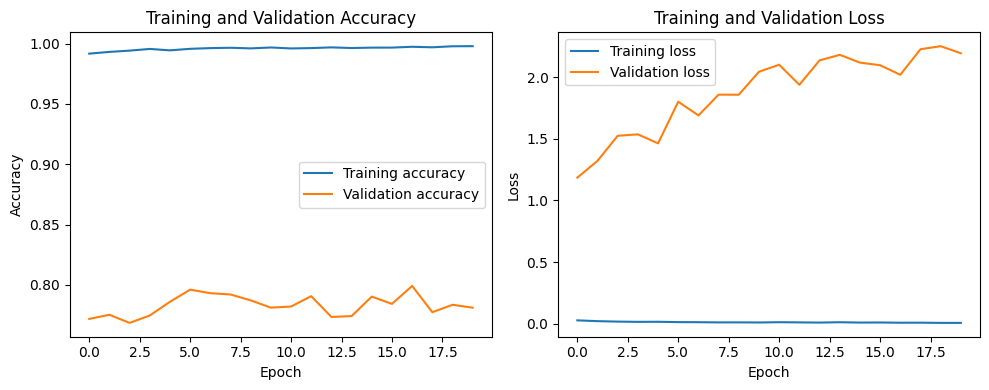

In [16]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(train_acc, label='Training accuracy')
plt.plot(test_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(train_loss, label='Training loss')
plt.plot(test_loss, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


To obtain an objective and threshold-independent operating point for the ANN, the optimal classification threshold was determined from the Receiver Operating Characteristic (ROC) curve using Youden’s J statistic **( J = TPR − FPR )** . This criterion selects the threshold that maximizes the difference between the true positive rate and the false positive rate, thereby providing the best balance between sensitivity and specificity.

The predicted posterior probabilities for the attack class were used to compute the ROC curve, and the threshold corresponding to the maximum value of Youden’s J was selected as the optimal decision boundary. Final class labels were then obtained by applying this threshold to the predicted probabilities, and standard evaluation metrics including Accuracy, Precision, Recall, F1-score, ROC-AUC, and the Confusion Matrix were computed.

This evaluation setting yields a balanced operating point that is independent of any single metric optimization and allows a fair comparison with other classifiers under identical threshold selection criteria.

In [17]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train_enc, num_classes=2)
y_test_cat = to_categorical(y_test_enc, num_classes=2)


In [18]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')   # 2 classes
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    "best_ann_model.h5",
    monitor='val_loss',
    save_best_only=True
)

history = model.fit(
    X_train, y_train_cat,
    epochs=200,
    batch_size=256,
    validation_data=(X_test, y_test_cat),
    callbacks=[early_stop, checkpoint],
    verbose=1
)



Epoch 1/200


C:\Users\Shantanu Ojha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


472/493 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9597 - loss: 0.1215

493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9803 - loss: 0.0601 - val_accuracy: 0.7602 - val_loss: 1.1962
Epoch 2/200
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9928 - loss: 0.0231 - val_accuracy: 0.7557 - val_loss: 1.3793
Epoch 3/200
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9940 - loss: 0.0181 - val_accuracy: 0.7399 - val_loss: 1.7064
Epoch 4/200
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9944 - loss: 0.0163 - val_accuracy: 0.7590 - val_loss: 1.6203
Epoch 5/200
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9949 - loss: 0.0161 - val_accuracy: 0.7812 - val_loss: 1.4808
Epoch 6/200
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9955 - loss: 0.0138 - val_accuracy: 0.7659 - val_loss: 1.5650
Epoch 7/200
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9956 - loss: 0.0124 - val_accuracy: 0.7886 - val_loss: 1.3912
Epoch 8/200
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9959 - loss: 0.0120 - val_accuracy: 0.7929

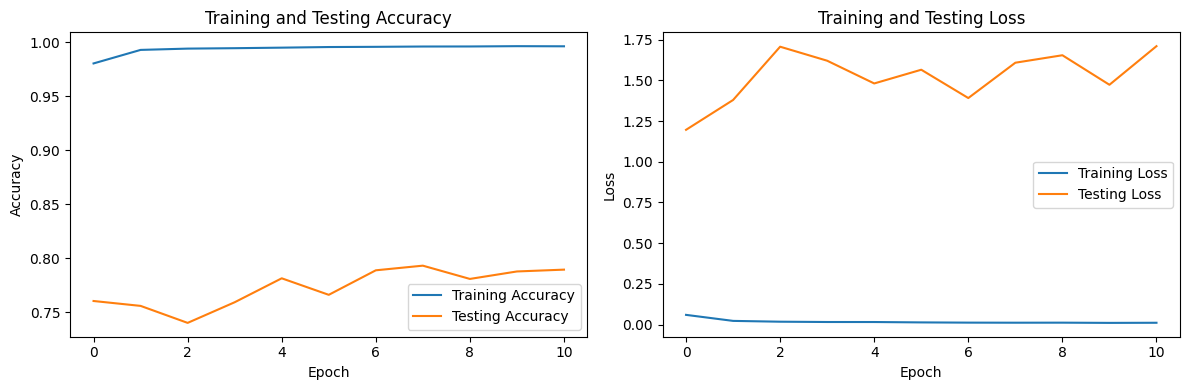

In [19]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [20]:
from tensorflow.keras.models import load_model
best_model = load_model("best_ann_model.h5")


# Predict probabilities on test set
y_prob_ann = best_model.predict(X_test)

# Convert softmax output to class labels
y_pred_ann = np.argmax(y_prob_ann, axis=1)
y_true_ann = np.argmax(y_test_cat, axis=1)

# Metrics
acc = accuracy_score(y_true_ann, y_pred_ann)
prec = precision_score(y_true_ann, y_pred_ann)
rec = recall_score(y_true_ann, y_pred_ann)
f1 = f1_score(y_true_ann, y_pred_ann)
auc = roc_auc_score(y_true_ann, y_prob_ann[:,1])
cm = confusion_matrix(y_true_ann, y_pred_ann)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1-score:", f1)
print("ROC-AUC:", auc)
print("Confusion Matrix:\n", cm)


705/705 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step
Accuracy: 0.7602022711142654
Precision: 0.6565340702494364
Recall: 0.9296673874987128
F1-score: 0.7695848606256926
ROC-AUC: 0.8987192498602746
Confusion Matrix:
 [[8110 4723]
 [ 683 9028]]


A feed-forward Artificial Neural Network (ANN) was implemented using the Keras Sequential API to model nonlinear relationships in the NSL-KDD feature space. The network consists of two fully connected hidden layers with 128 and 64 neurons respectively, both using ReLU activation functions, followed by a softmax output layer with two neurons corresponding to the binary classes (Normal and Attack).

The model was trained using the Adam optimizer with a learning rate of 0.001 and the categorical cross-entropy loss function, in accordance with the configuration described in the reference study. To prevent overfitting and to ensure selection of the best-generalizing model, early stopping was employed based on the validation loss with a patience of 10 epochs. Additionally, model checkpointing was used to save the network weights corresponding to the epoch with the minimum validation loss.

Training was performed for a maximum of 200 epochs with a batch size of 256, while the official NSL-KDD test set was used as the validation set. The final model used for evaluation corresponds to the epoch that achieved the lowest validation loss, thereby reflecting the best trade-off between fitting the training data and generalizing to unseen network traffic.

In [21]:
from sklearn.svm import SVC

svm = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    probability=True,   # needed for ROC / AUC
    random_state=42
)

svm.fit(X_train, y_train_binary)

y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)[:,1]

In [24]:
y_train_enc = le.fit_transform(y_train_binary)
y_test_enc = le.transform(y_test_binary)
y_pred_svm_enc = le.transform(y_pred_svm)  

acc = accuracy_score(y_test_enc, y_pred_svm_enc)
prec = precision_score(y_test_enc, y_pred_svm_enc)
rec = recall_score(y_test_enc, y_pred_svm_enc)
f1 = f1_score(y_test_enc, y_pred_svm_enc)
auc = roc_auc_score(y_test_enc, y_prob_svm)
cm = confusion_matrix(y_test_enc, y_pred_svm_enc)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1-score:", f1)
print("ROC-AUC:", auc)
print("Confusion Matrix:\n", cm)


Accuracy: 0.7721344925479063
Precision: 0.6606942102304666
Recall: 0.968283389970137
F1-score: 0.7854487741719918
ROC-AUC: 0.8886052294302298
Confusion Matrix:
 [[8004 4829]
 [ 308 9403]]


A Support Vector Machine (SVM) with a radial basis function (RBF) kernel was trained for binary intrusion detection on the NSL-KDD dataset to discriminate between normal and attack traffic. The classifier was evaluated using the default decision threshold (0.5) without applying any post-hoc threshold optimization.

The model demonstrates strong class separability, as indicated by a high ROC-AUC score, confirming its ability to distinguish malicious from benign traffic. At the default operating point, the SVM exhibits a precision-oriented behavior, achieving relatively high precision with a moderate recall. This reflects a conservative decision boundary that reduces false positives at the cost of missing a fraction of attack instances.

In [28]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test_enc, y_prob_svm)
j_scores = tpr - fpr
best_threshold = thresholds[j_scores.argmax()]

y_pred_opt = (y_prob_svm >= best_threshold).astype(int)

# y_test_enc is already 0/1
# y_pred_opt is already 0/1

print("Optimized Accuracy:", accuracy_score(y_test_enc, y_pred_opt))
print("Optimized Precision:", precision_score(y_test_enc, y_pred_opt))
print("Optimized Recall:", recall_score(y_test_enc, y_pred_opt))
print("Optimized F1:", f1_score(y_test_enc, y_pred_opt))
print("Optimized AUC:", roc_auc_score(y_test_enc, y_prob_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test_enc, y_pred_opt))


Optimized Accuracy: 0.8519783534421576
Optimized Precision: 0.7853178155774395
Optimized Recall: 0.9033055298115539
Optimized F1: 0.8401896460897467
Optimized AUC: 0.8886052294302298
Confusion Matrix:
 [[10435  2398]
 [  939  8772]]


To analyze the effect of the decision threshold on intrusion detection performance, the Support Vector Machine (SVM) classifier was further evaluated under a threshold-optimized setting. Instead of using the default probability threshold of 0.5, the optimal threshold was selected from the Receiver Operating Characteristic (ROC) curve using Youden’s J statistic, defined as 
**J=TPR−FPR**. This criterion identifies the operating point that maximizes the difference between the true positive rate and the false positive rate, thereby providing a balanced trade-off between attack detection and false alarm rates.

The posterior probabilities predicted by the SVM were used to compute the ROC curve, and the threshold corresponding to the maximum value of Youden’s J was chosen as the optimal decision boundary. Final class labels were then generated using this threshold, and standard performance metrics including Accuracy, Precision, Recall, F1-score, ROC-AUC, and the Confusion Matrix were computed.

This threshold-optimized evaluation allows the classifier to operate at its most discriminative point and highlights the inherent precision–recall trade-off in intrusion detection systems. The results demonstrate how appropriate calibration of the decision threshold can significantly influence the balance between false positives and false negatives, which is critical for practical IDS deployment.